# Imports

In [45]:
import os
import sys
from PIL import Image
from io import BytesIO
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from azure.storage.blob import BlobServiceClient
sys.path.append(os.path.abspath(".."))
from config import AZURE_STORAGE_CONTAINER_NAME

# Configuration

In [46]:
load_dotenv()
AZURE_STORAGE_CONNECTION_STRING = os.getenv("AZURE_STORAGE_CONNECTION_STRING")

In [47]:
GAME_TOKEN = "1etn5dXvJxDnuBXF"

# Setting up connection to Azure Blob Storage

In [48]:
blob_service_client = BlobServiceClient.from_connection_string(AZURE_STORAGE_CONNECTION_STRING)
container_client = blob_service_client.get_container_client(AZURE_STORAGE_CONTAINER_NAME)

In [49]:
blob_list = container_client.list_blobs(GAME_TOKEN)

# Retrieving and displaying images

In [50]:
images = []

for blob in blob_list:
    blob_client = container_client.get_blob_client(blob.name)
    blob_data = blob_client.download_blob().readall()
    images.append(Image.open(BytesIO(blob_data)))

print(f"Loaded {len(images)} images for game '{GAME_TOKEN}'.")

Loaded 5 images for game '1etn5dXvJxDnuBXF'.


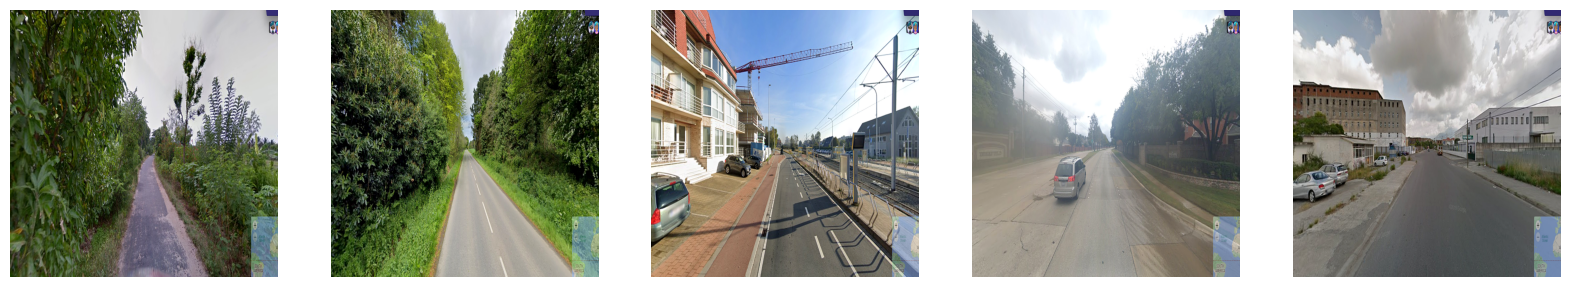

In [51]:
plt.figure(figsize=(20, 10))

for i, img in enumerate(images):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img)
    plt.axis("off")

plt.show()